In [177]:
import sys
sys.path.append('../src/')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json
import scipy
from antenna import Antenna
import itertools
from tqdm import tqdm

In [2]:
with open("../config.json", 'r') as cfg:
    params = json.load(cfg)

antenna_params = params["antenna_params"]
opt_params = params["optimisation_params"]

In [184]:
antenna_params['N'] = 100

In [185]:
antenna_params["wavelengths"]=[1, 2]
antenna = Antenna(antenna_params)
antenna.set_objective(weights=[1.0, 1.0])
antenna.set_jacobian(weights=[1.0, 1.0])
antenna.set_hessian(weights=[1.0, 1.0])

In [186]:
np.sqrt(abs(min(np.linalg.eigvals(antenna.afs[0].conj().T@antenna.afs[0])) * min(np.linalg.eigvals(antenna.afs[1].conj().T@antenna.afs[1]))))

3.9606998738847275e-06

In [93]:
np.linalg.eigvals(antenna.afs[0].conj().T@antenna.afs[0])

array([1638.20689606+2.17850644e-28j,  688.39887067-1.32528632e-28j,
        532.38051931-7.60461913e-28j,  444.4784795 +4.44960971e-28j,
        392.68057535+1.92523523e-28j,  354.35044045+1.04122051e-29j,
        326.6938435 -2.65696534e-27j,  304.18035983-6.15301102e-28j,
        286.42562874-1.47205249e-27j,  271.24871208-1.70073102e-27j,
        258.66250821-1.84265081e-27j,  247.57919442-8.63702183e-27j,
        238.08529405-8.99697023e-27j,  229.55658554-2.26496051e-27j,
        222.08401502-6.70198917e-27j,  215.27452589-1.62092384e-27j,
        209.20813566-1.38194795e-24j,  203.62050313-1.67611996e-20j,
        198.57871522-5.17498519e-17j,  193.89608106-2.83724131e-14j,
        189.62809906+2.51902594e-18j,  185.6378605 -1.52999888e-16j,
        181.97122595+1.52951138e-16j,  178.52476241-2.80510933e-14j,
        175.33650338-5.64239738e-16j,  172.326408  -2.81259300e-14j,
        169.52618807+8.24569491e-17j,  166.87267288-2.79442292e-14j,
        164.39245764-6.52644169e-1

In [187]:
A = scipy.linalg.block_diag(*antenna.afs)

In [188]:
b = np.concatenate((antenna.beams))

In [189]:
x = np.linalg.lstsq(A, b, rcond=None)

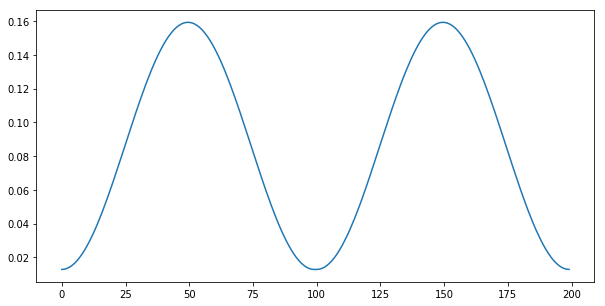

In [190]:
plt.figure(figsize=(10, 5))
plt.plot(abs(x[0]))

In [191]:
B = np.block([[0*np.eye(100), np.eye(100)], [np.eye(100), 0*np.eye(100)]])

In [192]:
def f(x, eps=0.9):
    x = x.reshape(-1, 1)
    return np.linalg.norm(A@x - b)**2 + eps*x.T@B@x

In [193]:
temp = []
for i in tqdm(np.arange(0, 0.4, 0.001)):
    res = scipy.optimize.minimize(f, x0=np.ones(antenna.N * antenna.n_currents), args=(i, ))
    temp.append(res.fun)

  0%|▏                                                                                 | 1/400 [00:05<37:53,  5.70s/it]

KeyboardInterrupt: 

In [171]:
np.linalg.norm(A@(res.x).reshape(-1, 1) - b)**2

0.01069004149881636

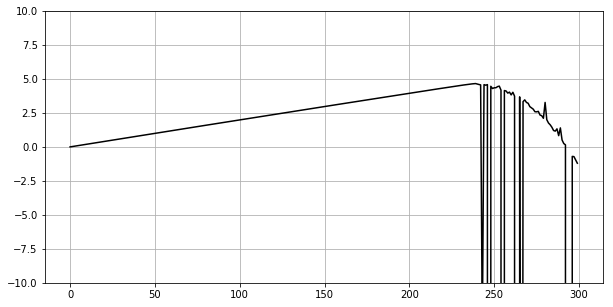

In [182]:
plt.figure(figsize=(10, 5))
plt.plot(temp, 'k')
plt.ylim([-10, 10])
plt.grid(True)

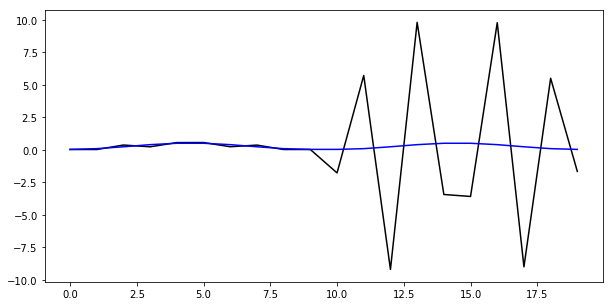

In [183]:
plt.figure(figsize=(10, 5))
plt.plot(res.x, 'k')
plt.plot(abs(x[0]), 'b')